# <font color=#ffa500>Webnb - Random Forest Regressor</font>

Após comparar uma série de modelos de regressão por meio do pycaret – no arquivo 'Webnb_pycaret.ipynb' – e concluir que o Random Forest é o melhor modelo para a previsão dos preços de cada imóvel, começou a ser implementada a regressão no modelo em questão.

## <font color=#ffa500>Importando as bibliotecas</font>

Primeiramente, foram importadas todas as bibliotecas necessárias.

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()
%config InlineBackend.figure_format = 'svg'

## <font color=#ffa500>Carregando a base de dados</font>

Em seguida, foi carregado o arquivo 'dados_anuncios_airbnb_tratados.csv' para obter a base de dados e, para que seja fosse utilizá-lo na regressão, foram excluídas todas as linhas com argumentos nulos, por meio do comando `dropna()`.

In [11]:
dados = pd.read_csv('dados_anuncios_airbnb_tratados.csv')
dados = dados.dropna()
dados.head()

,Título,Preço (R$),Avaliação,Bairro,Imóvel,Hóspedes,Camas,Quartos,Banheiros,Cozinha,Wi-Fi,Piscina
0,FLAT PARTICULAR NO MELIA - AV. IBIRAPUERA,110,4.90,Indianópolis,Flat inteiro,2,1,1,1,Tem,Tem,Tem
1,Studio novinho a 300 m metrô - Self check in,117,4.80,Consolacao,Apartamento inteiro,5,3,0,1,Tem,Tem,Tem
2,Studio encantador em São Paulo próximo ao metrô,110,4.87,Consolacao,Flat inteiro,2,1,1,1,Tem,Tem,Tem
3,Flat mobiliado ao lado do Hospital Sirio Libanês,80,4.61,Bela Vista,Flat inteiro,2,1,1,1,Tem,Tem,Não tem
4,Suíte moderna com cama de casal no Brooklin,54,4.89,Vila Olímpia,Quarto inteiro,2,1,1,1,Tem,Tem,Não tem


## <font color=#ffa500>Separando dados para regressão</font>

Então, começou-se a preparar a base de dados para a regressão. Para tanto, primeiramente foram separadas as colunas que seriam utilizadas como <i>x</i> e <i>y</i> na regressão. No caso, para prever o Preço <i>y</i>, utilizamos as colunas de Avaliação, Bairro, Imóvel, Hóspedes, Camas, Quartos, Banheiros, Cozinha, Wi-Fi, Piscina em <i>x</i>. Vale ressaltar que para implementá-las na regressão, as variáveis categóricas foram transformadas em dummies, por meio do comando `get_dummies`.

In [12]:
X = dados[['Avaliação', 'Bairro', 'Imóvel', 'Hóspedes', 'Camas', 'Quartos', 'Banheiros', 'Cozinha', 'Wi-Fi', 'Piscina']]
X = pd.get_dummies(data=X, drop_first=True)
y = dados['Preço (R$)']

Em seguida, os dados foram separados em treino e teste, sendo 70% para treino e 30% para teste.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=70)

## <font color=#ffa500>Implementando o Random Forest</font>

Separados os dados de treino e teste, foi criado um regressor Random Forest e, com ele, foi realizado o treinamento da base de dados de treino.

In [14]:
reg = RandomForestRegressor(random_state=0) 
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Então, o regressor foi utilizado para prever os preços na base de testes. 

In [15]:
Y_pred = reg.predict(X_test)

## <font color=#ffa500>Resultados</font>

A partir dos resultados obtidos na regressão por Random Forest, foi verificada a acurácia do modelo, pela comparação dos preços estimados com os preços reais dos imóveis.

### <font color=#ffa500>$R^{2}$<font color=#ffa500>

In [16]:
R_squared = reg.score(X_test, y_test)
R_squared #score do R**2, mas o que faz mais sentido analisar é o RMSE (tira raiz do erro medio quadrado)

0.7140754535014905

### <font color=#ffa500>Analisando RMSE</font>

Analisando o score RMSE podemos concluir o quanto que nosso modelo de regressão erra em média em prever o preço do aluguel por noite de um anúncio em reais para mais ou para menos.

In [29]:
y_true = y_test
y_pred = reg.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_true, y_pred))
print('Nosso modelo erra o preço real do anúncio {:.2f} reais para mais ou para menos em média'.format(RMSE)) #RMSE

Nosso modelo erra o preço real do anúncio 29.18 reais para mais ou para menos em média


### <font color=#ffa500>Conclusões</font>

<BarContainer object of 59 artists>

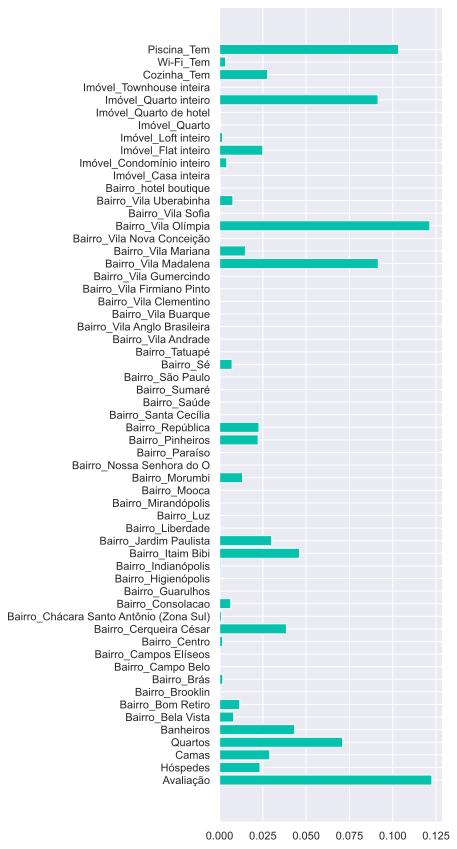

In [18]:
plt.figure(figsize=(4,15))
plt.barh(X_test.columns, reg.feature_importances_, color='xkcd:turquoise')

Analisando a influência das features sobre a previsão do preço do anúncio, podemos ver que as características mais importantes para determinar o preço de um anuncio são a avaliação, quantidade de quartos, se tem piscina, se o imóvel é quarto inteiro ou se está em um bairro nobre como Vila Madalena ou Vila Olímpia.